In [1]:
from cbir import CBIR
import cv2
import os
import networkx as nx
import cProfile

In [2]:
def profile(func):
    def decorated(*args, **kwargs):
        pr = cProfile.Profile()
        pr.enable()
        result = func(*args, **kwargs)
        pr.disable()
        pr.print_stats(sort="tottime")
        return result

In [19]:
cbir = CBIR("data/jpg", n_branches=5, depth=5, sift_implementation="pytorch")

In [20]:
cbir.extract_features()
cbir.fit()
cbir.index()

Extracting features 1491/1491 from image 149902.jpg - ETA: 0.000000s
673229 features extracted
Extracting features 1491/1491 from image 149902.jpg - ETA: 0.000000s
673229 features extracted
Computing clusters 3655/3125 with 89 features from node 3655 at level 4						
Generating index
Indexing image 1492/1491:  149902.jpg - ETA: 0.000000ss
Calculating weights
Inverted index generated


In [27]:
cbir.encode("104002")

array([0.03846154, 0.03846154, 0.01192606, ..., 0.        , 0.        ,
       0.        ])

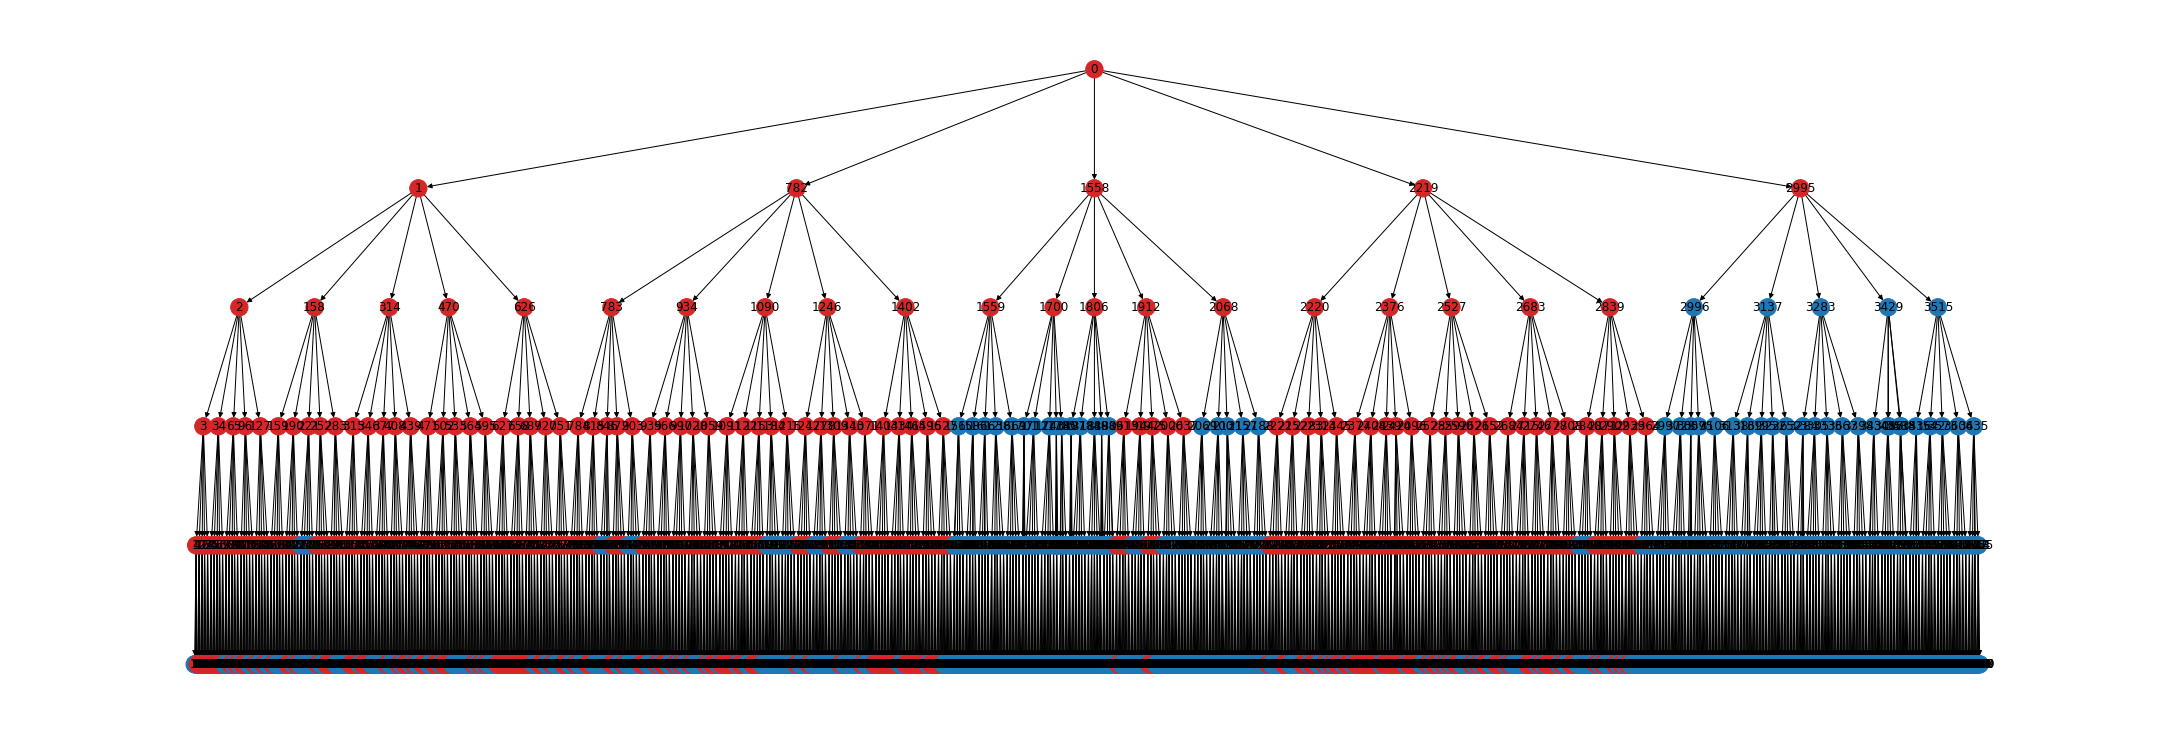

In [22]:
cbir.encode("104002", return_graph=True)

In [50]:
import random
import matplotlib.pyplot as plt
queries = random.choices(cbir.dataset.all_images, k=20)
for query in queries: 
    scores = cbir.retrieve(query)
    cbir.show_results(query, scores, n=7)
    plt.show()

C:\Users\epignatel\Documents\repos\sberbank\cbir.py:203: RuntimeWarning: invalid value encountered in true_divide
  # store the encoded representation


ValueError: setting an array element with a sequence.

In [31]:
profile(cbir.retrieve, r"C:\Users\epignatel\Documents\repos\sberbank\data\jpg\104002.jpg")
profile(cbir.retrieve, r"C:\Users\epignatel\Documents\repos\sberbank\data\jpg\130000.jpg")
profile(cbir.retrieve, r"C:\Users\epignatel\Documents\repos\sberbank\data\jpg\106600.jpg")
profile(cbir.retrieve, r"C:\Users\epignatel\Documents\repos\sberbank\data\jpg\106600.jpg")

         418448 function calls (405545 primitive calls) in 0.297 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    14392    0.053    0.000    0.128    0.000 linalg.py:2316(norm)
      516    0.047    0.000    0.195    0.000 cbir.py:166(propagate_feature)
    14393    0.028    0.000    0.028    0.000 {built-in method numpy.array}
27297/14394    0.026    0.000    0.138    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.017    0.017    0.235    0.235 cbir.py:144(propagate)
    26832    0.012    0.000    0.016    0.000 graph.py:666(nodes)
     1491    0.009    0.000    0.048    0.000 cbir.py:213(score)
     4476    0.009    0.000    0.018    0.000 ntpath.py:178(split)
    14392    0.008    0.000    0.147    0.000 <__array_function__ internals>:2(norm)
    12901    0.007    0.000    0.025    0.000 <__array_function__ internals>:2(dot)
    12901    0.006    0.000    0.006    0.000 {m